# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

**Does the Smartcab move at all during the simulation?**

I have seen all 24 steps and through each step sometimes the cab not moved through his environement. I have noticed this when I have something like "Agent stat not been updated" that means that the cab didn't move in my understanding.

**What kind of rewards is the driving agent receiving?**

About the rewards I notice that we have positive or negative rewards. The positive one when the agent follow the waypoint for instance : "Agent followed the waypoint left. (rewarded 1.23)" and the negative when for instance the cab pass through a red light then we got this kind of message with a negative reward : "Agent attempted driving forward through a red light. (rewarded -9.70). There is also a possibility of minor accident tha have a high negaive reward (-20.56). Also as closer we get to our destination rewards getting lower and lower.

**How does the light changing color affect the rewards?**

As I explained upon when the agent try to go forward anyway when the light is red the reward is negative (ex. -9.70) but also if we have a green light and the agent doesn't go forward (even if no oncoming traffic) then it's got negative reward (-4.25 or -5.10). Instead when the light is red and the cab correctly stay without going forward we have a positive reward (2.46).


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*


In my opinion main ones are on the driving function (run). I will choose :

**env**

This variable allows as to change the environment by changing the agents on the environement (by the parameter "num_dummies), the number of intersections and also the possibility to add new outputs on the simulation (verbose=True).

**agent**


In this case we have the agent creation that use the class "LearningAgent" created just before. The second parameter is "Learning" if we set this as "True" we would force the agent to use Q-Learning to reduce complexity. Q-Learning as a reinforcement learning technique provides to the agent the possibility to make a decision on a Markov decision process. 


**sim**

Here we setup the simulation and we use all parameters we consider for the simulations. Here we can set several parameters such as the update_delay that allow us to choose the time lapse between the actions, the display that wa can set on if we want to display out our simulation or the log metrics that set logs for the simulation and save them on the directory we have created previously. Finally, we also have an option that could allow us to change logs name.




- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*

The class function called is the function act() that consider the action and perform it if it is legal.


- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*

The main difference is that the render_text() function and the render() function is that the first one will render on the command prompt (non-display GUI) and the second one will render the output on a display GUI version. Especially, the render() function will use pygame parameter to display out the simulation we run.


- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

The next_waypoint() function collect location details first by calling self.env.grid_size object sotck on bounds variable and by determining the state of the agent on the environement. Then uses the variable heading to get the direction and delta_a and delta_b to choose the direction to take based on three variables : bounds, delta_a and delta_b.

In the planner.py the next_waypoint() consider east-west direction first.



-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


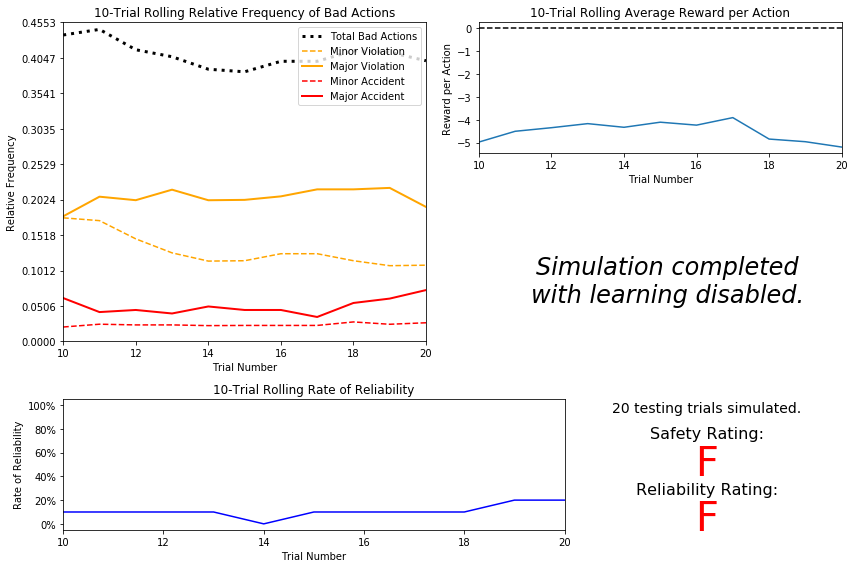

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**


- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

In according with the plot upon I notice that almost 40% of time the smartcab took bad decisions when the Q-learning is disabled.


- *Given that the agent is driving randomly, does the rate of reliability make sense?*

It makes sense since we could compare both two results randomly and not randomly. That means that we could notice a difference between this function and a Q-learning one. In my opinion the random choice could be close to 50% of reliability in average and the optimize function should be much better in terms of reliability.

- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

In fact, we could see that it has been penalized heavily. The average is under minus 4 (-4) and it makes sense since it is a random choice that he made for each action he took during the simulation.

- *As the number of trials increases, does the outcome of results change significantly?*

I have tried to double the number of trials (sim.run(n_test = 10 vs n_test = 20) and I have noticed that the outcome results slightly changed and are worse thant the first simulation. for example the average for the reward are wors (clos to minus 5) and also the reliability rate going down (close to 10%). That means that if we use randomization for taking decisions and we improve the number of test the outcomes will be worse and worse.


- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*


we cannot consider this smartcab neither safe or reliable for several reasons. If we follow the Table on the top of this notebook we notice that with a rate of F for "safety" the smartcab causes one major accident and it passes through red ligh and cross traffic. In the same time, reliability is not well rated neither. With a rate of "F" we notice that our agent fails at least 60% of time to reach the destination.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**


**Which features available to the agent are most relevant for learning both safety and efficiency?**

I have chosen two features : waypoint and inputs.

**safety**

Concerning the safety the the inputs feature is mandatory to improve this item because it includes light, directions and oncoming traffic. All inputs are necessary because the agent need to be informed about how it's going on his exploration. They are also necessary to improve the safety and get a better score.

The input light is the most relevant because it is used to determine if it's safe to go to any direction when is green

Two inputs are relevant for **safety** and **efficient** : 

- Waypoint

is relevant when combined  with another feature such as light for improving safety and effient scores.

- Left

for determining if it's safe to make a right on red light when the left car tries to move forward

- oncoming

for checking if it's safe to make a left on green when the oncoming car moves forward or if it's safe to go right on any light when the oncoming car goes left turn.




**Why are these features appropriate for modeling the Smartcab in the environment?**

In my opinion these features are appropriate because they allow to move on the environement by taking in consideration oncoming traffic, lights and directions to take to get the destination. 


**If you did not choose some features, why are those features not appropriate?**

This feature push the agent to violate traffic rules in order to respect time goal. But since it is a continous variable (0-5) it would increase significantly state spaces.

I didn't choose the **deadline** because I thought that this has an informational side that tells us more about the completion of our goal but it wouldn't instead have an impact on the final desired output. In my understanding, this feature won't help us much more neaither in safey or efficiency.

- Right

I did not choose right neither because if I understood correctly if we think to all possible actions to the car on our right it wouldn't interference with the agent. In another hand it could be interesting to keep for U-turn but in this environment there are none. Then in order to simplify the number of states and get a better score on reliability and safety I have decided to put it out.

Here the post of a Udacity mentor that explain this behavior : https://discussions.udacity.com/t/safety-rating-stuck-at-f/288828/26

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**


**what would be the size of the state space?**

If I take both features I have chosen I have as a result

**Inputs** : Light (2), left (4), oncoming (4)


**Waypoint (3)**

Then I have in total : 2 x 4 x 4 x 3 = 96 state spaces


**the driving agent could learn a policy for each possible state within a reasonable number of training trials?**

I don't think that the number of training could have an impact since we don't have all features took in count for the simumlation then only partial information won't be able to increase the realiability and the safety of the simulation.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

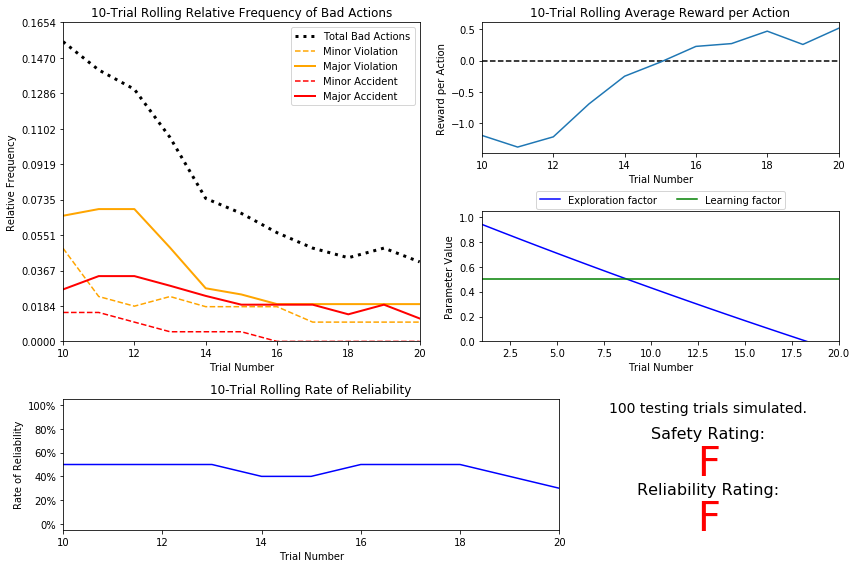

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

For a general observation of implmenting a Q-Learning simulation we can observe that the reliability rate is going up at the end of trials. There is a very low percentage of minor and major violations (0.16 roughly) and also rewards going up while we are going forward with the trials. Instead the safety rating and reliability are very low that means that total number of accidents is pretty high and our agent rarely get the destinations and it is not what we wanted at the beginning.

- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*

I notice that the reliability rating is F for both of them that means that neither of them is close to get the destination during the simulation. 


- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*

It took 20 trials before testing.I used alfa as a decay function. The formula that I used is 
$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

There were 20 trials. The value of epsilon is decreased by 0.05 at every step (alfa). So, with minimum 20 trials (as harcoded in the simulator) the tolerance set to 0.05, we are perfectly aligned with the checks setup in the system resulting in 20 trials. 1.0/0.05 = 20.


- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*

It is slightly decreased. Specially the number of minor accidents decreased but the others are pretty stable. I can notice that I did not improve the output as the Q-Learning was supposed to do.

- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*

the number of bad actions were lower and also the rewards increased (-0.1 vs -4.95).

- *How does the safety and reliability rating compare to the initial driving agent?*

Unfortunately it didn't improved as expected. I think that my choose of decay and epsilon value didn't help to improve these indicators.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

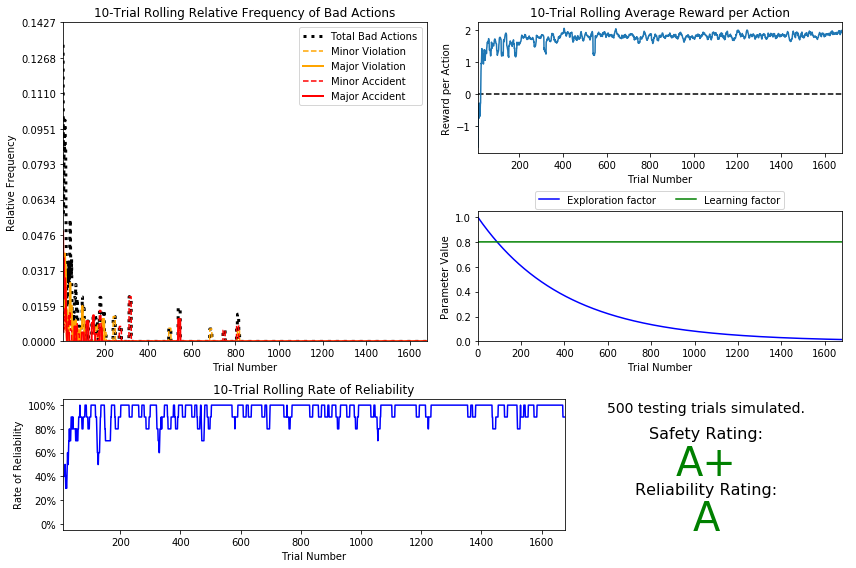

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**



- *What decaying function was used for epsilon (the exploration factor)?*

I used $$ \epsilon = a^t, \textrm{for } 0 < a < 1$$ function for decay epsilon.

- *Approximately how many training trials were needed for your agent before begining testing?*

It took 500 trials before testing since with a learning rate of 0.8 and a tolerance of 0.015 I have obtained $$ \epsilon = 0.99^{t} $$ which result $$ {t} = \log _{0.8} .015 = 500 $$ I used a pretty agressive learning rate and a low tolerance rate.

- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

I used an epsilon tolerance of 0.15 that and a learning rate of 0.8 that is pretty agressive. Since tolerance mechanism is able to estimate convergent policieis without speedup or delays in agent's learning it allows to achieve good action policies fast in a noisy environement. Since the maximum tolerance is 0.05 I thought that a tolerance around the average could benefit our algorightm in learning on the environement created.

- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

The improvement has been huge. I passed to a double F (Reliability, Safety) to A+ for safety and A for the reliability. That means that the settings chosen gave a very avantage to our algorightm thanks to all parameters fixed.

- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

Yes I could say that the agent learned the good and appropriate policy in order to get an excellent feedback to the environement.


- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

I am extremely satified since I obtained the maximum result I could have obtained by using tolerance, learning rate, decay function.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 


1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 

If we take in consideration state-space-definition ('waypoint', 'light', 'left', 'right' 'oncoming') I assumed to have several different behaviors :

Going toward through the waypoint if the light is green. Unless if the agent want to turn left and there is an oncoming vehicule and get right when I oncoming vehicule want to go left.

Usually you stop at red light unless you have to turn left or right before the light.

If there is no oncoming vehicule the agent can go forward, right or left if the traffic light is green.

It has to stop at red light unless it turns right before the traffic light (with the given environement it cannot turn left at a red light). In this case it should pay attention if another oncoming vehicule turn left then he can continue but if it the vehicule turn right then should be stop going.

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?


3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

There is some examples that show that the agent follow the policy created for him.

The state I have set on the code is state = (waypoint, inputs['light'], inputs['left'], inputs['oncoming'])

If I open 'sim_improved-learning.txt' I can notice for instance that :


Here below there are some examples of optimal policies

At the red light the only reward is for a waypoint equal to none in order to stop the agent at the red light then. None has the highest Q-value as expected.

('left', 'red', 'right', 'left')
 -- None : 1.92
 -- forward : 0.00
 -- right : 0.00
 -- left : 0.00


We have another example of optimal policy below where the highest Q-value is None at the waypoint feature since the light feature is red.

('left', 'red', 'right', 'right')
 -- None : 2.08
 -- forward : -7.24
 -- right : 0.00
 -- left : -32.28
 
 
 ('left', 'red', None, None)
 -- None : 2.72
 -- forward : 0.00
 -- right : -0.41
 -- left : -8.12
 
 
 Finally, this last example is to show a optimal policy for a waypoint forward at a green light. Of cours it has the highest Q-value since it is a best move in this scenario.
 
('forward', 'green', None, 'forward')
 -- None : 0.00
 -- forward : 1.21
 -- right : 0.00
 -- left : 0.00

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.


Now we discuss about suboptimal policies. You will find some examples below :


In this case since the left inputs is safe it could have the highest Q-value but it is not the case. So this example is for me a suboptimal.

('left', 'green', None, 'forward')
 -- None : -3.47
 -- forward : -0.28
 -- right : 0.90
 -- left : -16.33
 
Finally, this is an example of suboptimal policy because at a red light the highest Q-value is attributed to a right input and not to a None waypoint and this is not safe at all for the simulation we run.
 
('right', 'red', 'right', 'left')
 -- None : 0.00
 -- forward : 0.00
 -- right : 2.46
 -- left : 0.00


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.